# 算法原理

1．支持向量机最简单的情况是线性可分支持向量机，或硬间隔支持向量机。构建它的条件是训练数据线性可分。其学习策略是最大间隔法。可以表示为凸二次规划问题，其原始最优化问题为

$$\min _{w, b} \frac{1}{2}\|w\|^{2}$$

$$s.t. \quad y_{i}\left(w \cdot x_{i}+b\right)-1 \geqslant 0, \quad i=1,2, \cdots, N$$

求得最优化问题的解为$w^*$，$b^*$，得到线性可分支持向量机，分离超平面是

$$w^{*} \cdot x+b^{*}=0$$

分类决策函数是

$$f(x)=\operatorname{sign}\left(w^{*} \cdot x+b^{*}\right)$$

最大间隔法中，函数间隔与几何间隔是重要的概念。

线性可分支持向量机的最优解存在且唯一。位于间隔边界上的实例点为支持向量。最优分离超平面由支持向量完全决定。
二次规划问题的对偶问题是
$$\min \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j}\left(x_{i} \cdot x_{j}\right)-\sum_{i=1}^{N} \alpha_{i}$$

$$s.t. \quad \sum_{i=1}^{N} \alpha_{i} y_{i}=0$$

$$\alpha_{i} \geqslant 0, \quad i=1,2, \cdots, N$$

通常，通过求解对偶问题学习线性可分支持向量机，即首先求解对偶问题的最优值
 
$a^*$，然后求最优值$w^*$和$b^*$，得出分离超平面和分类决策函数。

2．现实中训练数据是线性可分的情形较少，训练数据往往是近似线性可分的，这时使用线性支持向量机，或软间隔支持向量机。线性支持向量机是最基本的支持向量机。

对于噪声或例外，通过引入松弛变量$\xi_{\mathrm{i}}$，使其“可分”，得到线性支持向量机学习的凸二次规划问题，其原始最优化问题是

$$\min _{w, b, \xi} \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{N} \xi_{i}$$

$$s.t. \quad y_{i}\left(w \cdot x_{i}+b\right) \geqslant 1-\xi_{i}, \quad i=1,2, \cdots, N$$

$$\xi_{i} \geqslant 0, \quad i=1,2, \cdots, N$$

求解原始最优化问题的解$w^*$和$b^*$，得到线性支持向量机，其分离超平面为

$$w^{*} \cdot x+b^{*}=0$$

分类决策函数为

$$f(x)=\operatorname{sign}\left(w^{*} \cdot x+b^{*}\right)$$

线性可分支持向量机的解$w^*$唯一但$b^*$不唯一。对偶问题是

$$\min _{\alpha} \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j}\left(x_{i} \cdot x_{j}\right)-\sum_{i=1}^{N} \alpha_{i}$$

$$s.t. \quad \sum_{i=1}^{N} \alpha_{i} y_{i}=0$$

$$0 \leqslant \alpha_{i} \leqslant C, \quad i=1,2, \cdots, N$$

线性支持向量机的对偶学习算法，首先求解对偶问题得到最优解$\alpha^*$，然后求原始问题最优解$w^*$和$b^*$，得出分离超平面和分类决策函数。

对偶问题的解$\alpha^*$中满$\alpha_{i}^{*}>0$的实例点$x_i$称为支持向量。支持向量可在间隔边界上，也可在间隔边界与分离超平面之间，或者在分离超平面误分一侧。最优分离超平面由支持向量完全决定。

线性支持向量机学习等价于最小化二阶范数正则化的合页函数

$$\sum_{i=1}^{N}\left[1-y_{i}\left(w \cdot x_{i}+b\right)\right]_{+}+\lambda\|w\|^{2}$$

3．非线性支持向量机

对于输入空间中的非线性分类问题，可以通过非线性变换将它转化为某个高维特征空间中的线性分类问题，在高维特征空间中学习线性支持向量机。由于在线性支持向量机学习的对偶问题里，目标函数和分类决策函数都只涉及实例与实例之间的内积，所以不需要显式地指定非线性变换，而是用核函数来替换当中的内积。核函数表示，通过一个非线性转换后的两个实例间的内积。具体地，$K(x,z)$是一个核函数，或正定核，意味着存在一个从输入空间x到特征空间的映射$\mathcal{X} \rightarrow \mathcal{H}$，对任意$\mathcal{X}$，有

$$K(x, z)=\phi(x) \cdot \phi(z)$$

对称函数$K(x,z)$为正定核的充要条件如下：对任意$$\mathrm{x}_{\mathrm{i}} \in \mathcal{X}, \quad \mathrm{i}=1,2, \ldots, \mathrm{m}$$，任意正整数$m$，对称函数$K(x,z)$对应的Gram矩阵是半正定的。

所以，在线性支持向量机学习的对偶问题中，用核函数$K(x,z)$替代内积，求解得到的就是非线性支持向量机

$$f(x)=\operatorname{sign}\left(\sum_{i=1}^{N} \alpha_{i}^{*} y_{i} K\left(x, x_{i}\right)+b^{*}\right)$$

4．SMO算法

SMO算法是支持向量机学习的一种快速算法，其特点是不断地将原二次规划问题分解为只有两个变量的二次规划子问题，并对子问题进行解析求解，直到所有变量满足KKT条件为止。这样通过启发式的方法得到原二次规划问题的最优解。因为子问题有解析解，所以每次计算子问题都很快，虽然计算子问题次数很多，但在总体上还是高效的。


----
分离超平面：$w^Tx+b=0$

点到直线距离：$r=\frac{|w^Tx+b|}{||w||_2}$

$||w||_2$为2-范数：$||w||_2=\sqrt[2]{\sum^m_{i=1}w_i^2}$

直线为超平面，样本可表示为：

$w^Tx+b\ \geq+1$

$w^Tx+b\ \leq+1$

margin：

**函数间隔**：$label(w^Tx+b)\ or\ y_i(w^Tx+b)$

**几何间隔**：$r=\frac{label(w^Tx+b)}{||w||_2}$，当数据被正确分类时，几何间隔就是点到超平面的距离

为了求几何间隔最大，SVM基本问题可以转化为求解:($\frac{r^*}{||w||}$为几何间隔，(${r^*}$为函数间隔)

$$\max\ \frac{r^*}{||w||}$$

$$(subject\ to)\ y_i({w^T}x_i+{b})\geq {r^*},\ i=1,2,..,m$$

分类点几何间隔最大，同时被正确分类。但这个方程并非凸函数求解，所以要先①将方程转化为凸函数，②用拉格朗日乘子法和KKT条件求解对偶问题。

①转化为凸函数：

先令${r^*}=1$，方便计算（参照衡量，不影响评价结果）

$$\max\ \frac{1}{||w||}$$

$$s.t.\ y_i({w^T}x_i+{b})\geq {1},\ i=1,2,..,m$$

再将$\max\ \frac{1}{||w||}$转化成$\min\ \frac{1}{2}||w||^2$求解凸函数，1/2是为了求导之后方便计算。

$$\min\ \frac{1}{2}||w||^2$$

$$s.t.\ y_i(w^Tx_i+b)\geq 1,\ i=1,2,..,m$$

②用拉格朗日乘子法和KKT条件求解最优值：

$$\min\ \frac{1}{2}||w||^2$$

$$s.t.\ -y_i(w^Tx_i+b)+1\leq 0,\ i=1,2,..,m$$

整合成：

$$L(w, b, \alpha) = \frac{1}{2}||w||^2+\sum^m_{i=1}\alpha_i(-y_i(w^Tx_i+b)+1)$$

推导：$\min\ f(x)=\min \max\ L(w, b, \alpha)\geq \max \min\ L(w, b, \alpha)$

根据KKT条件：

$$\frac{\partial }{\partial w}L(w, b, \alpha)=w-\sum\alpha_iy_ix_i=0,\ w=\sum\alpha_iy_ix_i$$

$$\frac{\partial }{\partial b}L(w, b, \alpha)=\sum\alpha_iy_i=0$$

代入$ L(w, b, \alpha)$

$\min\  L(w, b, \alpha)=\frac{1}{2}||w||^2+\sum^m_{i=1}\alpha_i(-y_i(w^Tx_i+b)+1)$

$\qquad\qquad\qquad=\frac{1}{2}w^Tw-\sum^m_{i=1}\alpha_iy_iw^Tx_i-b\sum^m_{i=1}\alpha_iy_i+\sum^m_{i=1}\alpha_i$

$\qquad\qquad\qquad=\frac{1}{2}w^T\sum\alpha_iy_ix_i-\sum^m_{i=1}\alpha_iy_iw^Tx_i+\sum^m_{i=1}\alpha_i$

$\qquad\qquad\qquad=\sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i=1}\alpha_iy_iw^Tx_i$

$\qquad\qquad\qquad=\sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)$

再把max问题转成min问题：

$\max\ \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)=\min \frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)-\sum^m_{i=1}\alpha_i$

$s.t.\ \sum^m_{i=1}\alpha_iy_i=0,$

$ \alpha_i \geq 0,i=1,2,...,m$

以上为SVM对偶问题的对偶形式

-----
kernel

在低维空间计算获得高维空间的计算结果，也就是说计算结果满足高维（满足高维，才能说明高维下线性可分）。

soft margin & slack variable

引入松弛变量$\xi\geq0$，对应数据点允许偏离的functional margin 的量。

目标函数：

$$\min\ \frac{1}{2}||w||^2+C\sum\xi_i\qquad s.t.\ y_i(w^Tx_i+b)\geq1-\xi_i$$ 

对偶问题：

$$\max\ \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)=\min \frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)-\sum^m_{i=1}\alpha_i$$

$$s.t.\ C\geq\alpha_i \geq 0,i=1,2,...,m\quad \sum^m_{i=1}\alpha_iy_i=0,$$

-----

Sequential Minimal Optimization

首先定义特征到结果的输出函数：$u=w^Tx+b$.

因为$w=\sum\alpha_iy_ix_i$

有$u=\sum y_i\alpha_iK(x_i, x)-b$


----

$$\max \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i=1}\sum^m_{j=1}\alpha_i\alpha_jy_iy_j<\phi(x_i)^T,\phi(x_j)>$$

$$s.t.\ \sum^m_{i=1}\alpha_iy_i=0,$$

$$ \alpha_i \geq 0,i=1,2,...,m$$


高斯核函数为什么能映射到无穷维度？

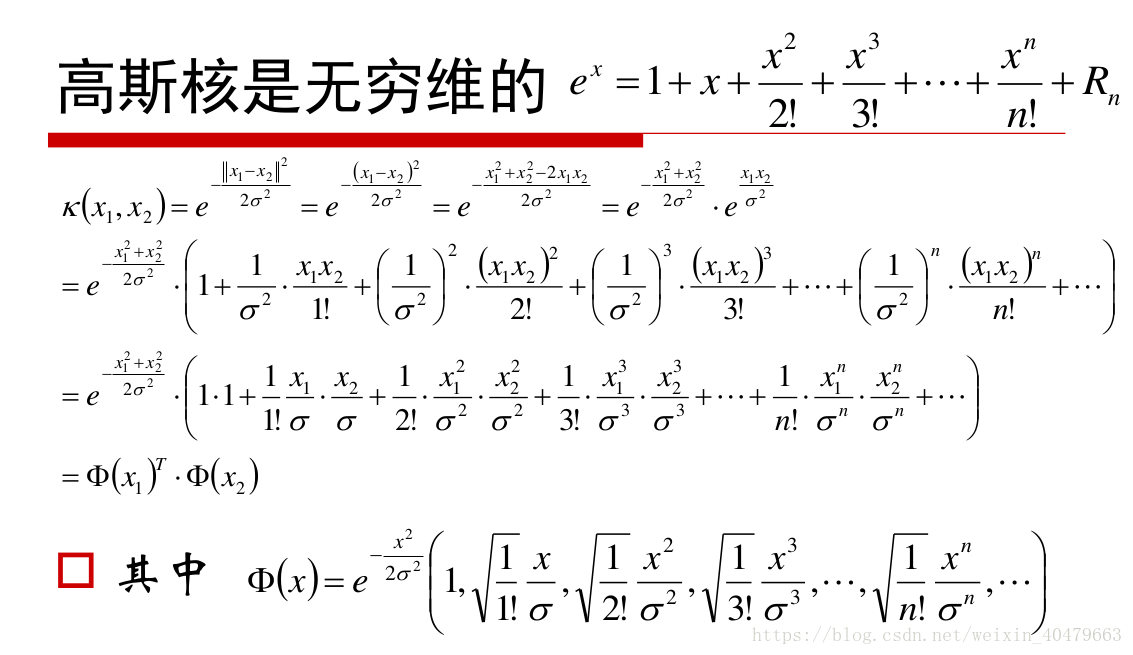

根据泰勒公式，e的指数函数可以写成无穷维的多项式函数， 高斯函数中有e的指数函数，通过推导可以得出两个e的指数函数相乘的形式。进而高斯核函数就可以表示为无穷维空间的多项式内积了.

# 数据准备

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC # 线性支持向量分类器
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

In [2]:
#读取数据
data = pd.read_csv("../data/iris.csv")
print(data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
#准备数据
data = data.dropna()
y = data['Species'].apply(lambda x: 1 if x == 'setosa' else 2 if x == 'versicolor' else 3)
x = data.drop(['Species'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [4]:
# 分类模型、参数
model = LinearSVC(dual='auto')
param_grid = {'C': [5, 10, 15]}

# GridSearchCV优化参数、训练模型
gsearch = GridSearchCV(model, param_grid)
model = gsearch.fit(x_train, y_train)

# 打印最优结果
print('LinearSVC params:', model.best_estimator_)

LinearSVC params: LinearSVC(C=5, dual='auto')


# 模型保存

In [5]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../outputs/best_models/svm.pkl')

# 加载模型
model = joblib.load('../outputs/best_models/svm.pkl')

In [6]:
# 法二
import pickle

with open('../outputs/best_models/svm.pkl', 'wb') as f:
    pickle.dump(model, f)

#读取Model
with open('../outputs/best_models/svm.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [7]:
prediction = model.predict(x_test)

In [8]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 1.0


In [9]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

